## Final Project Submission

Please fill out:
* Student name: Stephen Turk 
* Student pace: part time
* Scheduled project review date/time: 8/13/20 at 430 MST/ 630EST
* Instructor name: James Irving
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [7]:
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

After loading libraries and data, time to do some quick data exploration before cleaning

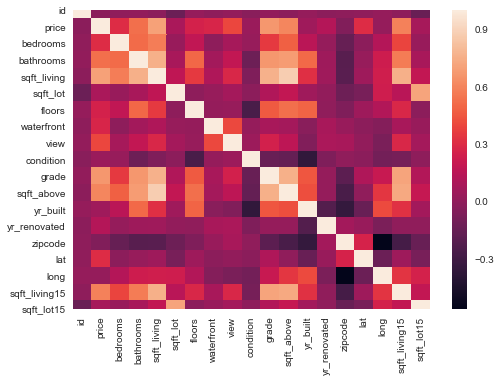

In [8]:
corr = data.corr()

sns.heatmap(corr)
plt.show()


In [10]:
data['date']= pd.to_datetime(data['date'])

In [11]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Dropping columns that showed little correllation and from the column descriptions only seemed moderately useful. Datesold might be useful in terms of sesason or important to adjust for if the time period in the data was a bit longer.

In [12]:
data = data.drop([ 'id', 'view', 'date'], axis = 1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


Waterfront needs some data added, but because this data seems categorical (either waterfront or not) I will assume that any missing data most likely was houses that were not on the waterfront.

In [14]:
data['waterfront'].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [15]:
data['waterfront'] = data['waterfront'].fillna(0)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 3.0+ MB


In [17]:
data['sqft_basement'].head()

0      0.0
1    400.0
2      0.0
3    910.0
4      0.0
Name: sqft_basement, dtype: object

In [18]:
data.sqft_basement = data.sqft_basement.map(lambda x: float(x.replace('?', '0')))

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10)
memory usage: 3.0 MB


Checking for null values

In [20]:
data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Only need to check into yr_renovated

In [21]:
data['yr_renovated'].head(15)

0        0.0
1     1991.0
2        NaN
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       NaN
13       0.0
14       0.0
Name: yr_renovated, dtype: float64

Looking for catagorical variables to one-hot encode:
Looks like, waterfront, condition, (likely grade), and zipcode (may be more usefull to categorize rather than just make 70 dummy variables). Though floors also has very few unique values I still think in general, that this will be a linear feature. After identifying categorical variables the next step is to one-hot encode and make sure to drop the first column from each feature to prevent multicolinearity.

In [57]:
feats = ['waterfront', 'condition', 'grade', 'zipcode']
data = data[feats]
data = pd.get_dummies(data, drop_first=True)

In [58]:
data.head()

,waterfront,condition,grade,zipcode
0,0.0,3,7,98178
1,0.0,3,7,98125
2,0.0,3,6,98028
3,0.0,5,7,98136
4,0.0,3,8,98074


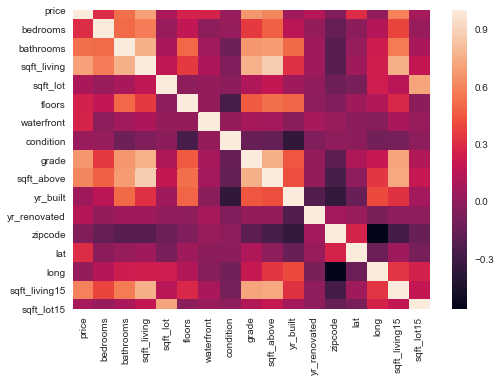

In [37]:
corr = data.corr()

sns.heatmap(corr)
plt.show()

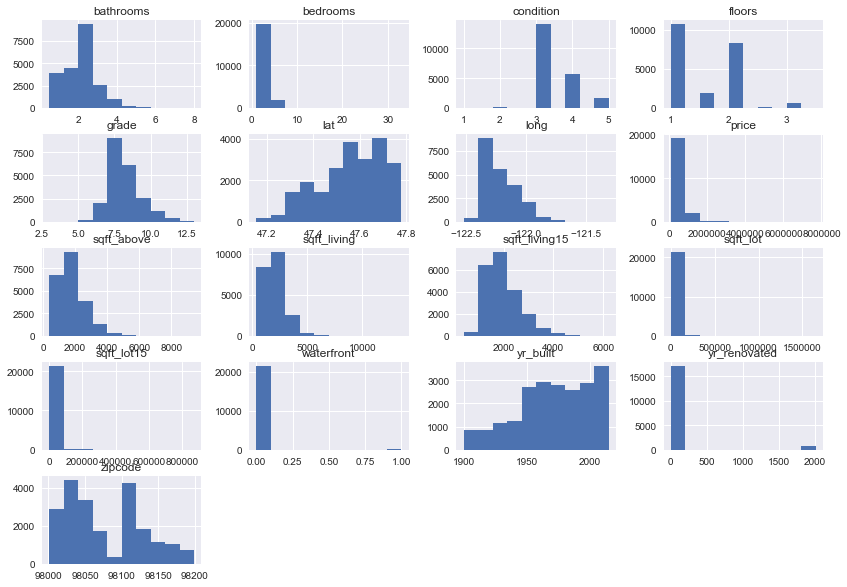

In [38]:
data.hist(figsize = (14,10))
plt.show()


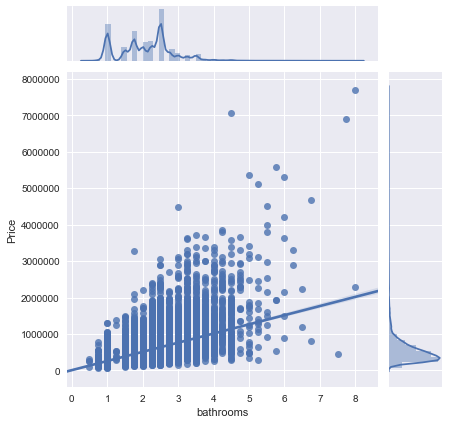

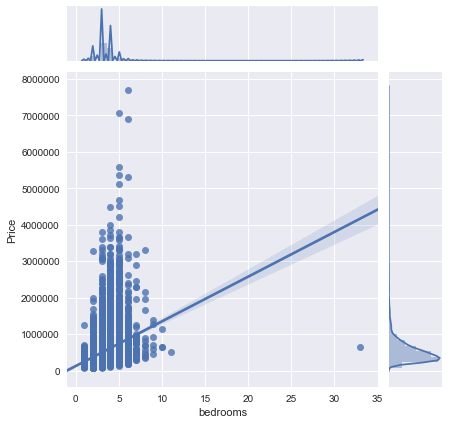

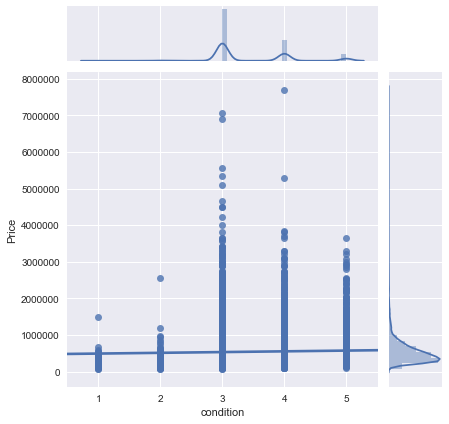

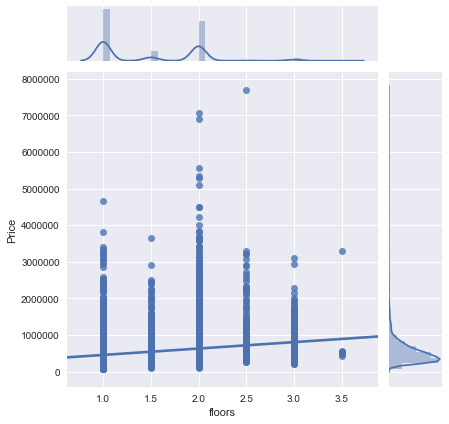

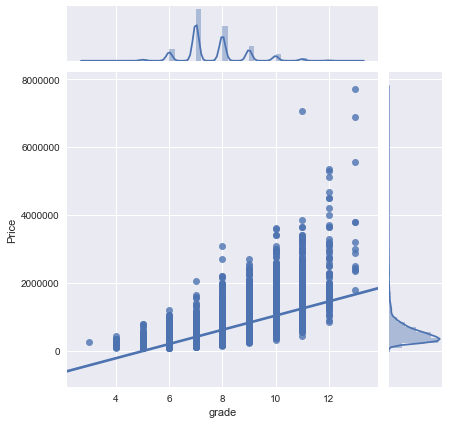

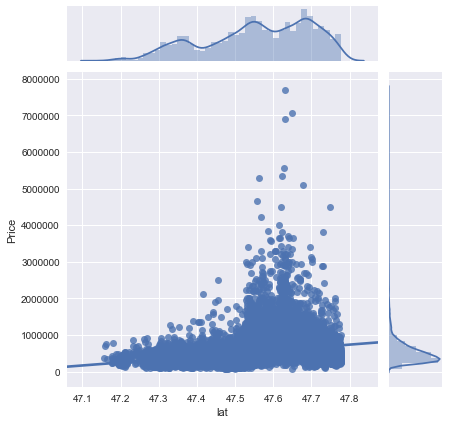

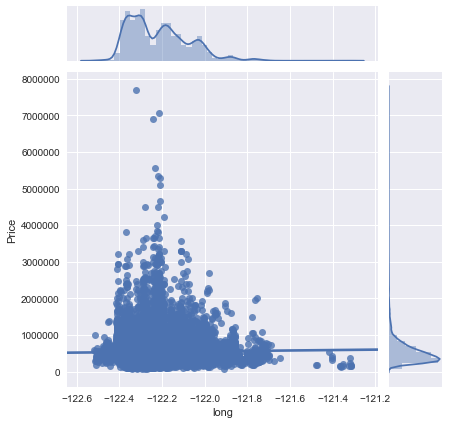

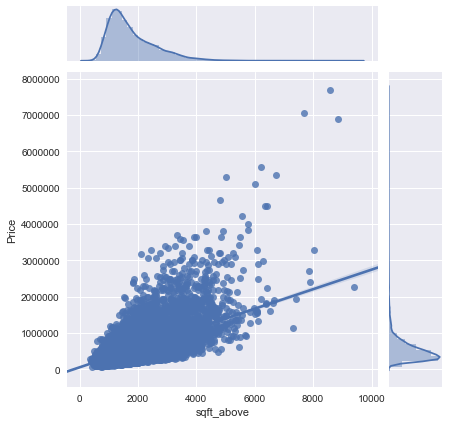

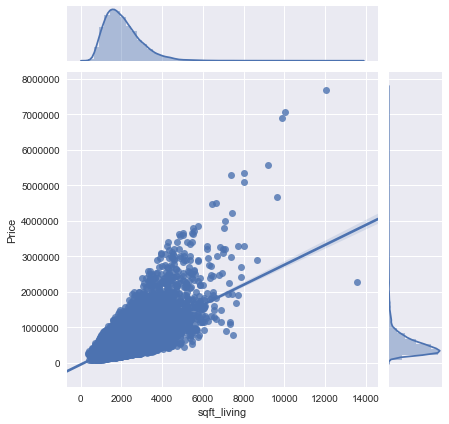

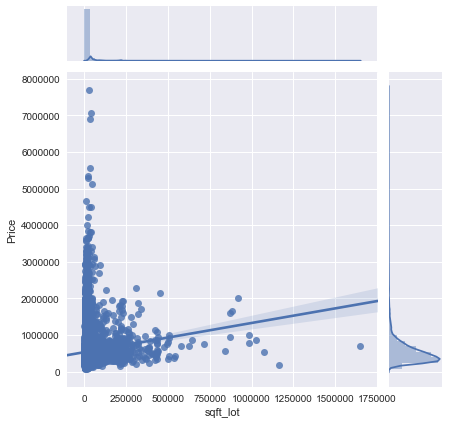

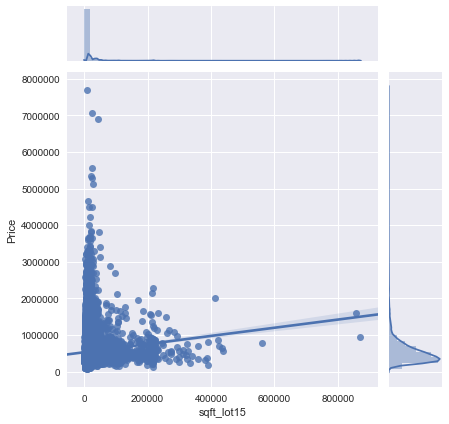

In [40]:
relcols = ['bathrooms', 'bedrooms', 'condition', 'floors', 
           'grade', 'lat', 'long', 'sqft_above', 'sqft_living',
          'sqft_lot', 'sqft_lot15']

for col in relcols:
    sns.jointplot(x = data[col], y = data['price'], data = data, kind = 'reg')
    plt.ylabel('Price')
    plt.show()
#investigating linearity of data


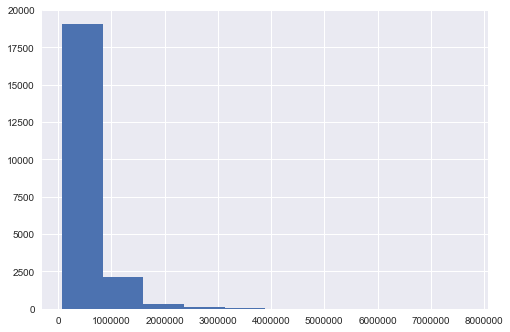

In [41]:
#checking into target variable

data['price'].hist()
plt.show()

In [46]:
outcome = 'price'
x_cols = list(data.columns)
x_cols.remove(outcome)

In [47]:
train, test = train_test_split(data)

In [48]:
print(len(train), len(test))
train.head()

16197 5400


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8749,733000.0,4,3.50,3080,5974,2.0,0.0,3,9,3080,0.0,2003,0.0,98075,47.6007,-121.974,2950,5425
19455,1390000.0,5,1.75,2650,11340,1.0,0.0,3,8,2650,0.0,1955,0.0,98004,47.6260,-122.213,2780,13204
5937,554000.0,2,1.00,820,3700,1.0,0.0,5,7,820,0.0,1968,0.0,98040,47.5880,-122.251,1750,9000
3249,1000000.0,5,4.50,2120,8944,2.0,1.0,5,8,2120,0.0,1939,1963.0,98006,47.5488,-122.197,2870,8944
6684,620000.0,3,1.75,1680,28046,1.0,0.0,3,8,1180,500.0,1948,0.0,98177,47.7648,-122.370,2190,26308


In [49]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     1750.
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:56:42   Log-Likelihood:            -1.8194e+05
No. Observations:               13317   AIC:                         3.639e+05
Df Residuals:                   13299   BIC:                         3.641e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -4.723e+06   3.84e+06     -1.229      0.219   -1.23e+07    2.81e+06
bedrooms      -4.007e+04   2432.375    -16.472      0.000   -4.48e+04   -3.53e+04
bathrooms      4.425e+04   4273.333     10.354      0.000    3.59e+04    5.26e+04
sqft_living     127.2195     25.839      4.924      0.000      76.572     177.867
sqft_lot          0.1700      0.058      2.908      0.004       0.055       0.284
floors         6157.2694   4757.766      1.294      0.196   -3168.629    1.55e+04
waterfront     8.168e+05   2.27e+04     35.957      0.000    7.72e+05    8.61e+05
condition      2.584e+04   3082.736      8.382      0.000    1.98e+04    3.19e+04
grade          9.848e+04   2848.995     34.567      0.000    9.29e+04    1.04e+05
sqft_above       56.9324     25.709      2.215      0.027       6.540     107.325
sqft_basement    41.0926     25.562      1.608      0.108      -9.012      91.197
yr_built      -2806.9828     94.936    -29.567      0.000   -2993.070   -2620.896
yr_renovated     24.7855      4.833      5.128      0.000      15.311      34.260
zipcode        -478.9786     43.308    -11.060      0.000    -563.868    -394.089
lat            5.797e+05   1.41e+04     41.223      0.000    5.52e+05    6.07e+05
long          -2.367e+05   1.73e+04    -13.722      0.000   -2.71e+05   -2.03e+05
sqft_living15    39.1724      4.499      8.706      0.000      30.353      47.992
sqft_lot15       -0.3284      0.091     -3.604      0.000      -0.507      -0.150
==============================================================================
Omnibus:                    11821.616   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1375279.515
Skew:                           3.778   Prob(JB):                         0.00
Kurtosis:                      52.208   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)

print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

18 15
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
Intercept,-4.723e+06,3.84e+06,-1.229,0.219,-1.23e+07,2.81e+06
bedrooms,-4.007e+04,2432.375,-16.472,0.000,-4.48e+04,-3.53e+04
bathrooms,4.425e+04,4273.333,10.354,0.000,3.59e+04,5.26e+04
sqft_living,127.2195,25.839,4.924,0.000,76.572,177.867
sqft_lot,0.1700,0.058,2.908,0.004,0.055,0.284


In [53]:
x_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [54]:
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     1983.
Date:                Fri, 31 Jul 2020   Prob (F-statistic):               0.00
Time:                        13:57:52   Log-Likelihood:            -1.8195e+05
No. Observations:               13317   AIC:                         3.639e+05
Df Residuals:                   13301   BIC:                         3.640e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.566e+06   3.79e+06     -1.470      0.142    -1.3e+07    1.86e+06
bedrooms      -4.021e+04   2431.560    -16.538      0.000    -4.5e+04   -3.54e+04
bathrooms      4.568e+04   4128.603     11.065      0.000    3.76e+04    5.38e+04
sqft_living     165.4371      5.398     30.646      0.000     154.856     176.019
sqft_lot          0.1694      0.058      2.900      0.004       0.055       0.284
waterfront     8.169e+05   2.27e+04     35.959      0.000    7.72e+05    8.61e+05
condition      2.554e+04   3077.854      8.298      0.000    1.95e+04    3.16e+04
grade          9.874e+04   2836.442     34.810      0.000    9.32e+04    1.04e+05
sqft_above       19.8842      5.028      3.955      0.000      10.030      29.739
yr_built      -2781.3228     92.816    -29.966      0.000   -2963.256   -2599.390
yr_renovated     25.0062      4.829      5.178      0.000      15.540      34.473
zipcode        -474.1166     43.128    -10.993      0.000    -558.654    -389.579
lat            5.812e+05    1.4e+04     41.471      0.000    5.54e+05    6.09e+05
long          -2.388e+05   1.72e+04    -13.886      0.000   -2.72e+05   -2.05e+05
sqft_living15    38.5409      4.474      8.614      0.000      29.771      47.311
sqft_lot15       -0.3344      0.091     -3.672      0.000      -0.513      -0.156
==============================================================================
Omnibus:                    11797.181   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1363695.430
Skew:                           3.767   Prob(JB):                         0.00
Kurtosis:                      51.999   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
cyl_dummies = pd.get_dummies(data['cylinders'], prefix='cyl', drop_first=True)
yr_dummies = pd.get_dummies(data['model year'], prefix='yr', drop_first=True)
orig_dummies = pd.get_dummies(data['origin'], prefix='orig', drop_first=True)